In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
from IPython.display import clear_output
# Import necessary library
import pandas as pd
import numpy as np
import nltk
import os
import nltk.corpus
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
clear_output()

In [0]:
path = "/content/drive/My Drive/CA683 Data Mining/Continuous Assignment/InsideAirbnb/data/"
calendar = pd.read_csv(path+"calendar.csv")
listings = pd.read_csv(path+"listings.csv")
reviews = pd.read_csv(path+"reviews.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# column list for differnt kinds of stuffs in the dataset for data selection

In [0]:
col_list = list(listings.columns)
for item in col_list:
  print('"'+item+'"',end=',')

"id","listing_url","scrape_id","last_scraped","name","summary","space","description","experiences_offered","neighborhood_overview","notes","transit","access","interaction","house_rules","thumbnail_url","medium_url","picture_url","xl_picture_url","host_id","host_url","host_name","host_since","host_location","host_about","host_response_time","host_response_rate","host_acceptance_rate","host_is_superhost","host_thumbnail_url","host_picture_url","host_neighbourhood","host_listings_count","host_total_listings_count","host_verifications","host_has_profile_pic","host_identity_verified","street","neighbourhood","neighbourhood_cleansed","neighbourhood_group_cleansed","city","state","zipcode","market","smart_location","country_code","country","latitude","longitude","is_location_exact","property_type","room_type","accommodates","bathrooms","bedrooms","beds","bed_type","amenities","square_feet","price","weekly_price","monthly_price","security_deposit","cleaning_fee","guests_included","extra_people

In [0]:
listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44077,https://www.airbnb.com/rooms/44077,20200321154917,2020-03-21,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,"Hi, My name is Teresa and we have 3 rooms ava...",Our house was built in 1937 when there was ple...,none,I like our neighbourhood as there is no shorta...,Dundrum was always known as a Spa Town and the...,There is a bus stop 2 mins up the road from us...,We have a beautiful landscaped garden with tab...,We live on the premises so we are always on ha...,Welcome to our cottage and we hope you will en...,NaN,NaN,https://a0.muscache.com/im/pictures/525706/050...,NaN,193005,https://www.airbnb.com/users/show/193005,Teresa,2010-08-06,Dublin Ireland,"I am a friendly outgoing Irishwoman ,who love...",within an hour,100%,100%,t,https://a0.muscache.com/im/users/193005/profil...,https://a0.muscache.com/im/users/193005/profil...,Churchtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,f,"Churchtown, Ireland",Churchtown,Dn Laoghaire-Rathdown,...,$0.00,3,1125,3,3,1125,1125,3.0,1125.0,a week ago,t,7,11,23,275,2020-03-21,227,38,2011-03-20,2020-03-06,95.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,t,f,moderate,t,t,3,0,3,0,2.07
1,85148,https://www.airbnb.com/rooms/85148,20200321154917,2020-03-21,Habitación en Dublín Double room,NaN,I'm renting a double room in my house in the s...,I'm renting a double room in my house in the s...,none,NaN,NaN,NaN,NaN,NaN,"Sorry, No smoking or pets. Lo siento esta proh...",NaN,NaN,https://a0.muscache.com/im/pictures/583752/61c...,NaN,466111,https://www.airbnb.com/users/show/466111,Don,2011-03-27,"Dublin, Ireland",I am single and live alone here so when I'm ...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/466111/profil...,https://a0.muscache.com/im/users/466111/profil...,Templeogue,1.0,1.0,"['email', 'phone', 'reviews']",t,f,"Templeogue, Dublin, Ireland",Templeogue,South Dublin,...,$10.00,1,5,1,1,5,5,1.0,5.0,4 months ago,t,0,0,0,140,2020-03-21,1,1,2019-05-11,2019-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,1,0,1,0,0.09
2,85156,https://www.airbnb.com/rooms/85156,20200321154917,2020-03-21,Cosy Comfortable Irish Cottage 1 Double Bed,Our Cottage is a charming light filled cottage...,"Hi , My name is Teresa and we have 3 rooms av...",Our Cottage is a charming light filled cottage...,none,"I love Dundrum and its surrounding areas , The...",We are always prepared to go the extra mile so...,There is a tram service to the city about 10 m...,"Guests have access to the kitchen to make tea,...",We live on site so we are availab

In [0]:
#@title Retrieve content in column { run: "auto" }
col_name = "reviews_per_month" #@param ["id","listing_url","scrape_id","last_scraped","name","summary","space","description","experiences_offered","neighborhood_overview","notes","transit","access","interaction","house_rules","thumbnail_url","medium_url","picture_url","xl_picture_url","host_id","host_url","host_name","host_since","host_location","host_about","host_response_time","host_response_rate","host_acceptance_rate","host_is_superhost","host_thumbnail_url","host_picture_url","host_neighbourhood","host_listings_count","host_total_listings_count","host_verifications","host_has_profile_pic","host_identity_verified","street","neighbourhood","neighbourhood_cleansed","neighbourhood_group_cleansed","city","state","zipcode","market","smart_location","country_code","country","latitude","longitude","is_location_exact","property_type","room_type","accommodates","bathrooms","bedrooms","beds","bed_type","amenities","square_feet","price","weekly_price","monthly_price","security_deposit","cleaning_fee","guests_included","extra_people","minimum_nights","maximum_nights","minimum_minimum_nights","maximum_minimum_nights","minimum_maximum_nights","maximum_maximum_nights","minimum_nights_avg_ntm","maximum_nights_avg_ntm","calendar_updated","has_availability","availability_30","availability_60","availability_90","availability_365","calendar_last_scraped","number_of_reviews","number_of_reviews_ltm","first_review","last_review","review_scores_rating","review_scores_accuracy","review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value","requires_license","license","jurisdiction_names","instant_bookable","is_business_travel_ready","cancellation_policy","require_guest_profile_picture","require_guest_phone_verification","calculated_host_listings_count","calculated_host_listings_count_entire_homes","calculated_host_listings_count_private_rooms","calculated_host_listings_count_shared_rooms","reviews_per_month"]
list_current = listings[col_name].unique()[0:5]
print(listings[col_name].value_counts())
print(col_list.index(col_name))
list_current

0.02     137
0.04     133
0.05     120
0.09     107
0.03     104
        ... 
6.67       1
6.23       1
5.59       1
7.48       1
23.90      1
Name: reviews_per_month, Length: 811, dtype: int64
105


array([2.07, 0.09, 1.69, 1.03, 3.19])

# Feature categories of the listings

In [0]:
# basicly the text information about the host
host_text_columns=['summary','space','description',"neighborhood_overview","notes","transit","access","interaction","house_rules","host_about"]
# 
host_string_columns = ["host_name","host_since","amenities"]

host_location_columns = ["host_neighbourhood","street","neighbourhood","neighbourhood_cleansed","city","market","host_location",
                         "latitude","longitude"]

host_numeric_columns = ["host_id","host_acceptance_rate","host_response_time","host_response_rate","host_listings_count",
                        "host_total_listings_count","square_feet","price","weekly_price","monthly_price",
                        "security_deposit","cleaning_fee","guests_included","extra_people","number_of_reviews",
                        "number_of_reviews_ltm","calculated_host_listings_count","calculated_host_listings_count_entire_homes",
                        "calculated_host_listings_count_private_rooms","calculated_host_listings_count_shared_rooms",
                        "reviews_per_month"]

host_date_columns = ["first_review"]

host_nights_columns = col_list[67:75]

host_category_columns = ["host_is_superhost","host_has_profile_pic","host_identity_verified","property_type","room_type",
                         "instant_bookable","is_business_travel_ready","require_guest_profile_picture","require_guest_phone_verification"]

host_score_columns = ["review_scores_rating","review_scores_accuracy","review_scores_cleanliness","review_scores_checkin",
                      "review_scores_communication","review_scores_location","review_scores_value"
                      ]
host_other_columns = ["host_verifications",]

## note
**amenities** is important, the contents like this. It already give us some useful information about what can have positive infuence of a host

>'{Internet,Wifi,Kitchen,"Free parking on premises","Smoking allowed",Breakfast,"Indoor fireplace",Heating,Washer,Dryer,"Smoke detector","Carbon monoxide detector","First aid kit","Fire extinguisher",Essentials,Shampoo,"Lock on bedroom door",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50","Hot water","Bed linens","Extra pillows and blankets","Ethernet connection",Microwave,"Coffee maker",Refrigerator,Dishwasher,"Dishes and silverware","Cooking basics",Oven,"Single level home","Patio or balcony","Garden or backyard","Host greets you"}'


# Split dataset by scores

In [0]:
listings.host_id.value_counts() # Are people with more houses better served? maybe new feature

31284582     58
160402201    44
123745971    38
152937423    35
264806441    34
             ..
250252005     1
19272422      1
315799744     1
3803885       1
64202703      1
Name: host_id, Length: 6353, dtype: int64

In [0]:
listing_scores = listings[host_score_columns]#.iloc[:,1:]
listing_scores['overall'] = listing_scores.iloc[:,1:].mean(axis=1)
listing_scores.fillna("non",inplace=True)
listing_scores.head(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,overall
0,95,10,10,10,10,10,10,10
1,non,non,non,non,non,non,non,non
2,96,10,9,10,10,10,10,9.83333


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'review_scores_accuracy')

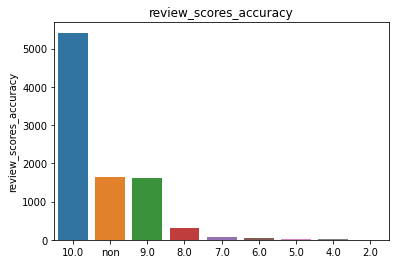

In [0]:
#barplot
target = listing_scores.columns[1]
sns.barplot(x = listing_scores[target].value_counts().index,y = listing_scores[target].value_counts()).set_title(target)

Text(0.5, 1.0, 'review_scores_checkin')

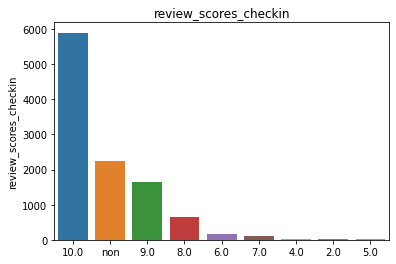

In [0]:
target = listing_scores.columns[2]
sns.barplot(x = listing_scores[target].value_counts().index,y = listing_scores[target].value_counts()).set_title(target)

Text(0.5, 1.0, 'review_scores_checkin')

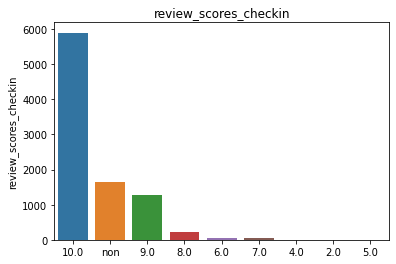

In [0]:
target = listing_scores.columns[3]
sns.barplot(x = listing_scores[target].value_counts().index,y = listing_scores[target].value_counts()).set_title(target)